#                                     White Wine Data Analysis

## Setting up the development environment by importing required libraries and modules:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


##### Numpy: It will provide the support for efficient numerical computation.
##### Pandas: It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data operations.
##### Matplotlib: It provides a MATLAB-like plotting framework.
##### Seaborn: It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive statistical graphics.
##### Sklearn: It is python library for data mining, data analysis and machine learning.

### Loading the white Wine dataset

###### Here, we can use the read_csv() from the pandas library to load data into dataframe from the remote url.

In [2]:
white=pd.read_csv("winequality-white.csv",sep=";")

##### The head() function of pandas helps in viewing the preview of the dataset for n-number of rows

In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Exploring the White Wine dataset:

In [4]:
white.shape


(4898, 12)

In [5]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##### From above lines we can learn that there are total 4898 observations with 12 different feature variables/attributes present in the White Wine dataset.

In [6]:
# Now, let's check the information about different variables/column from the dataset:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### * From the above information we can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.

In [7]:
# Let's look at the summary of the dataset,
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### * The summary of White Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
#### * All the data seems to be in range (with different scales, which needs standardization).

In [8]:
#cheking for missing values and sum them 
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### From the above we can observe that there is no missing value in dataset
### Now we have to check if there are any 0's in the set

In [9]:
white.isin([0]).sum()

fixed acidity            0
volatile acidity         0
citric acid             19
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

### We need to fill these 0's with some appropirate values

In [10]:
white=white.replace({'citric acid' : 0,},np.NaN)                     


white.isin([0]).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Calcutating the mean of citric acid

In [11]:
white['citric acid'].mean()

0.3354929288788686

### Replace this NaN with mean

In [12]:
white['citric acid'].isnull().sum()

19

In [13]:
white=white.fillna(white['citric acid'].mean())
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Learning more about the target/response variable/feature:

#### * Let's check how many unique values does the target feature 'quality' has? 

In [14]:
white["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

####      And how data is distributed among those values?

In [15]:
white.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

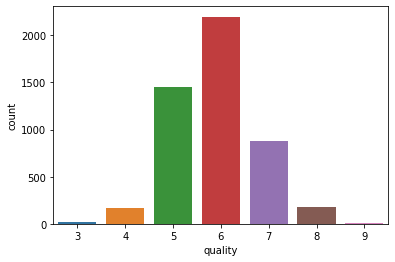

In [16]:
sns.countplot("quality",data=white)

#### * The above distribution shows the range for response variable (quality) is between 3 to 8.

#### Let's create a new discreet, categorical response variable/feature ('quality_label') from existing 'quality' variable.
#### i.e. low: 1-4,medium: 5-6 ,high: 7-10

In [17]:
condition=[(white["quality"]<4),(white["quality"]>7)]
quality_label=["Low","High"]
white["quality_label"]=np.select(condition,quality_label,default="Medium")
white.quality_label.value_counts()


Medium    4698
High       180
Low         20
Name: quality_label, dtype: int64

In [18]:
white.groupby('quality_label').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
High,6.678333,0.277972,0.328167,5.628333,0.038011,36.627778,125.883333,0.992214,3.221167,0.485667,11.651111,8.027778
Low,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000,3.000000
Medium,6.858376,0.278017,0.335771,6.420647,0.046033,35.180822,138.701469,0.994093,3.187009,0.490072,10.471430,5.807791


### Creating a Heatmap

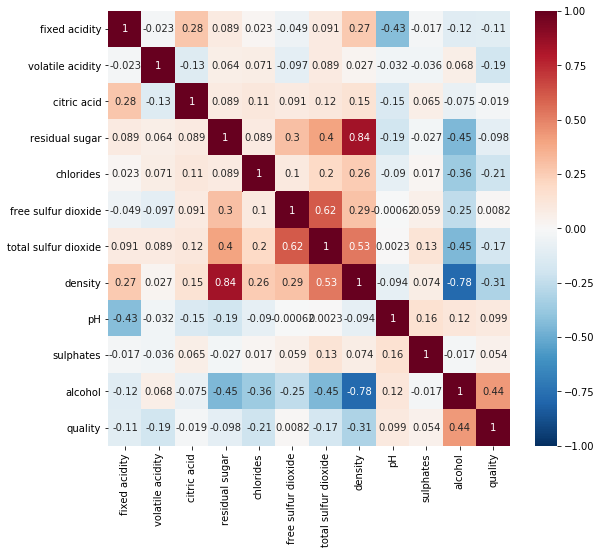

In [19]:
correlation=white.corr()
f,ax=plt.subplots(figsize=(9,8))
ax=sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,cmap="RdBu_r")

### sorting the features according to there effcts on outcome

In [20]:
correlation["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.018875
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

### Plotting boxplot for selected features 

#### alcohol

Text(0.5, 1.0, 'white wine')

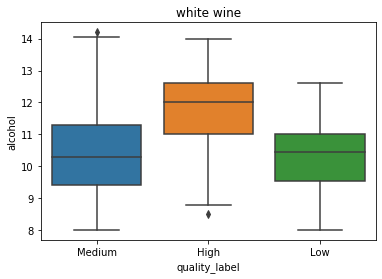

In [21]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="alcohol",data=white,ax=ax1)
ax1.set_title("white wine")

 #### pH

Text(0.5, 1.0, 'white wine')

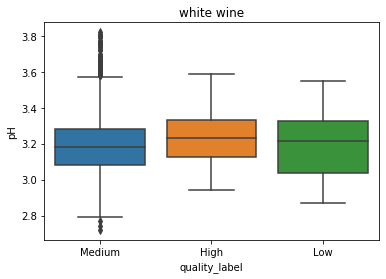

In [22]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="pH",data=white,ax=ax1)
ax1.set_title("white wine")

#### sulphates

Text(0.5, 1.0, 'white wine')

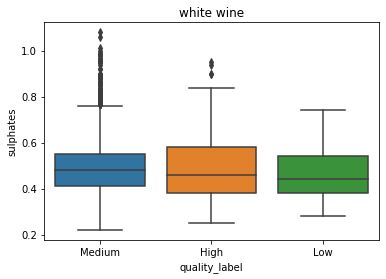

In [23]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y='sulphates',data=white,ax=ax1)
ax1.set_title("white wine")

#### free sulfur dioxide

Text(0.5, 1.0, 'white wine')

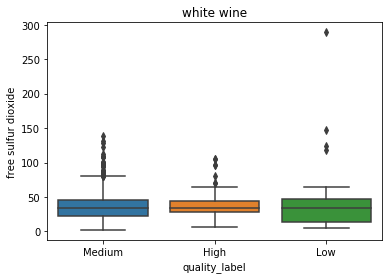

In [24]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y='free sulfur dioxide',data=white,ax=ax1)
ax1.set_title("white wine")

#### citric acid

Text(0.5, 1.0, 'white wine')

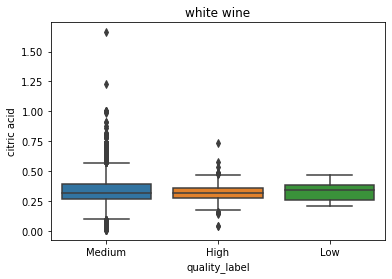

In [25]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="citric acid",data=white,ax=ax1)
ax1.set_title("white wine")

#### residual sugar

Text(0.5, 1.0, 'white wine')

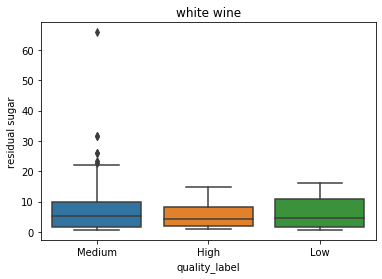

In [26]:
fig,(ax1)=plt.subplots(ncols=1)
#fig.figsize=(18,18)
sns.boxplot(x="quality_label",y="residual sugar",data=white,ax=ax1)
ax1.set_title("white wine")

#### lmplot for alcohol vs other features with linear Regression 

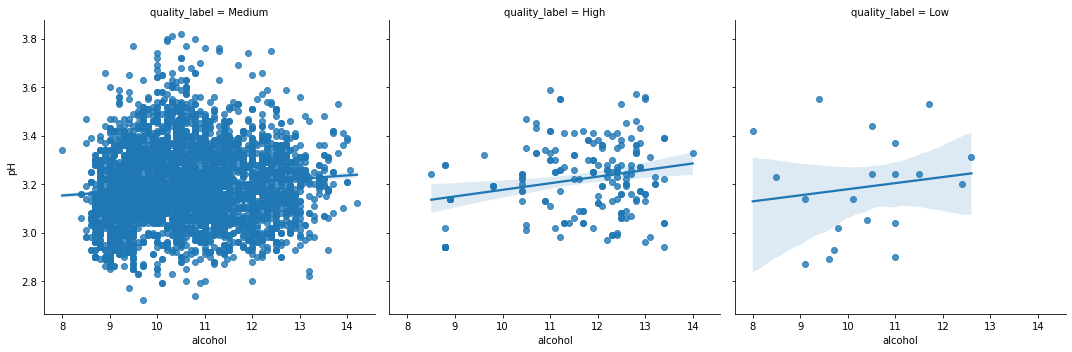

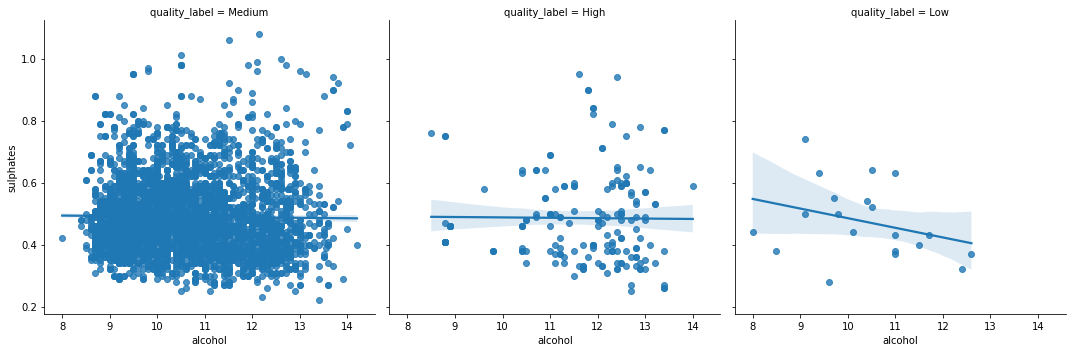

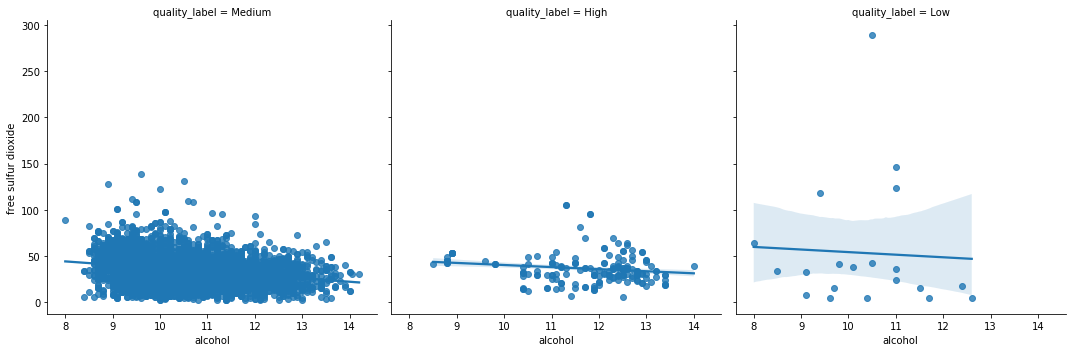

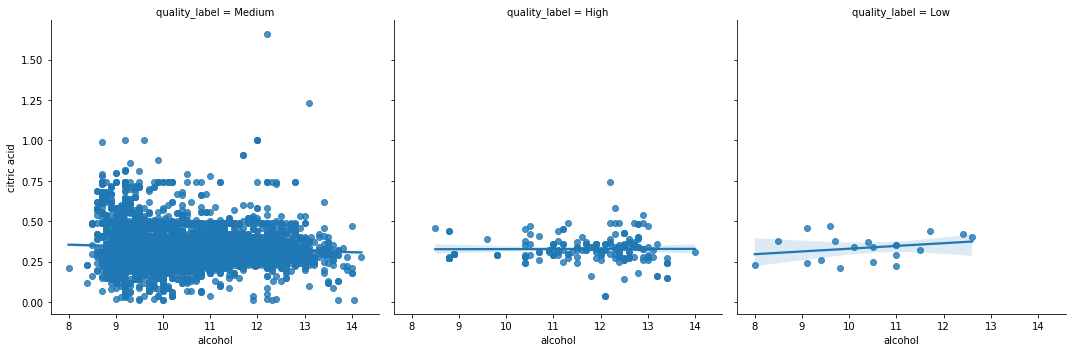

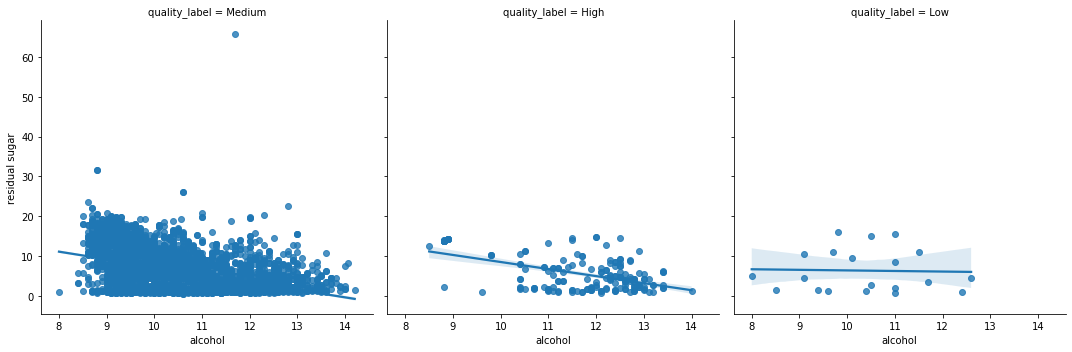

In [27]:
d=["pH",'sulphates','free sulfur dioxide','citric acid','residual sugar']
for i in d:
    sns.lmplot(x="alcohol",y=i,col="quality_label",data=white)

### The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and other features of  content of the red wine.

#### We can observe from the trendline that:-

#### * The amount of pH increases with increase in the content of alcohol in all high ,medium and low quality of wines

#### * The amount of the sulphates in high and medium content remains almost constant irrespective of alcohol content value.Whereas for low  quality wine, the sulphates content decreases gradually with the increase in alcohol content.

#### * The amount of free sulfur dioxide remain almost constant with increase in the content of alcohol in all high ,medium and low quality of wines

#### * The amount of the citric acid in high and medium content remains almost constant irrespective of alcohol content value.Whereas for low  quality wine, the citric acid content increases slightly with the increase in alcohol content.


#### * The amount of the residual sugar  in  high and medium wine types the residual sugar decrease  with increase alcohol content value. Whereas for low quality wine, the residual sugar content is constant with the increase in alcohol content.




### This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol andother features content of the White wine.

In [28]:
white["rate_code"]=(white["quality"]>4).astype(np.float32)

### Classification

### Classification using Sklearn's LogisticRegression:

In [29]:
X=white[['alcohol',"pH",'sulphates','free sulfur dioxide','citric acid','residual sugar']]
Y=white['rate_code']


In [30]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X, Y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(Y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       183
         1.0       0.96      1.00      0.98      4715

    accuracy                           0.96      4898
   macro avg       0.48      0.50      0.49      4898
weighted avg       0.93      0.96      0.94      4898



#### The accuracy matrix for sklearn's linear regression model for red wine quality prediction shows the overall 96%.
#### Also the precision for good wine (1) prediction is almost 96%.
#### But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.

### Classification using Sklearn's RandomForestClassifier:

In [31]:
y, X = dmatrices('rate_code ~ alcohol', data = white)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       183
         1.0       0.96      1.00      0.98      4715

    accuracy                           0.96      4898
   macro avg       0.48      0.50      0.49      4898
weighted avg       0.93      0.96      0.94      4898



#### Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of white wine quality, we can observe that the values remain same.
#### The precision for the prediction of bad quality wine (0) is almost 0% where as the precision for prediction of good quality wine (1) is approximately 96%.


## Classification using Sklearn's DecisionTreeClassifier:

In [32]:
y, X = dmatrices('rate_code ~ alcohol', data = white)
model = sklearn.tree.DecisionTreeClassifier(criterion="entropy",splitter="random")
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02       183
         1.0       0.96      1.00      0.98      4715

    accuracy                           0.96      4898
   macro avg       0.73      0.51      0.50      4898
weighted avg       0.95      0.96      0.95      4898



#### Here, with the accuracy matrix for sklearn's Decision Tree Classifier model for the prediction of white wine quality, we can observe that the values increases
#### The precision for the prediction of bad quality wine (0) is almost 50% where as the precision for prediction of good quality wine (1) is approximately 96%.
#### This sklearn's Decision Tree Classifier model also has the overall precision around 96%, which is far better than the previous two models (random forest classifier model and sklearn's linear regression model)


# Conclusion:

### We observed the key factors that determine and affects the quality of the white wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful and to overcome this, so we created another variable called 'rating'.
### To make predictions of wine quality and any other if required, we trained two models. As seen, the Sklearn's Random Forest Classifier and  sklearn's Linear Regression model along with  Decision Tree Classifier model. The  Decision Tree Classifier model performed marginally better and we decided to stick with it if we had to make any more predictions.
### The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.